# Центральная предельная теорема своими руками

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math

## Бета-распределение
 Будем генерировать выборки из бета-распределенной случайной величины с плотностью распределения
 $f_X(x)= \displaystyle\frac {1}  {\displaystyle\mathrm {B} (\alpha,\beta)} x^{\alpha -1 }(1-x)^{\beta -1 }$ 
 
  где $\alpha,\beta >0$ произвольные параметры, 
 $\mathrm {B} (\alpha,\beta) = \int\limits_0^1 x^{\alpha -1 }(1-x)^{\beta -1 }\,dx$ - бета-функция
 
 Пусть  $\alpha=1.0$ 
 и $\beta=2.0$  

 Из Википедии:
 
 Матожидание $\mu = \displaystyle\frac {\alpha} {\alpha + \beta} $ 
 
 Дисперсия $\sigma^2 = \displaystyle\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$ 
 
 По формулам выслилили мат.одижание и дисперсию нашей случайной величины с заданными параметрами. 
 

In [3]:
beta_rv = sts.beta(1,2)
mu = 1/3.   
D = 1/18.


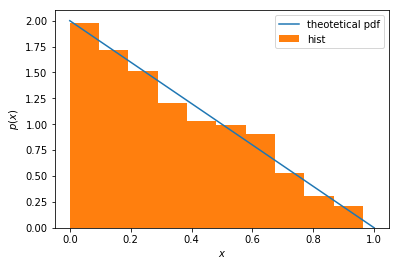

In [6]:
#Построим график плотности распределения и гистограмму случайной величины 
x = np.linspace(0,1,100)
y = beta_rv.pdf(x)
plt.plot(x, y, label = 'theotetical pdf')
plt.hist(beta_rv.rvs(1000), bins = 10, normed=True, label = 'hist')
plt.ylabel('$p(x)$')
plt.xlabel('$x$')
plt.legend()

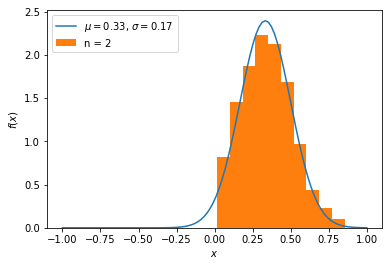

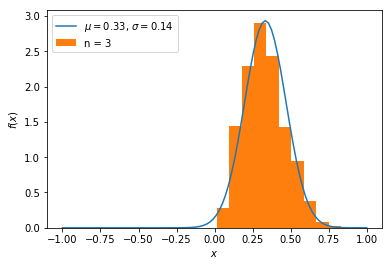

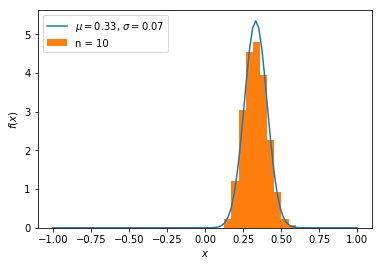

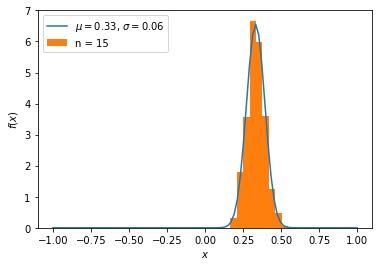

In [5]:

for n in [2,3,10,15]:                          #для каждого из заданных объемов выборок
    array_of_avg = []
    for i in range(0,1000):
        sample = beta_rv.rvs(size = n)         #генерируем выборку объема n 1000 раз
        array_of_avg.append(np.mean(sample))   #для каждой из выборок вычисляем выборочное среднее и добавляем в массив средних  
    
    sigma = math.sqrt(D/n)                     #считаем значение пар-ра sigma норм-ого распр-ния, которым, согласно ЦПТ, приближается распределение выборочных средних.
    norm_rv = sts.norm(mu, sigma)              #задаем случайную величину с нормальным распределением
    plt.figure()
    x = np.linspace(-1,1,100)
    y = norm_rv.pdf(x)
    plt.plot(x, y, label = '$\mu = %s$, $\sigma = %s $' % (round(mu,2),round(sigma,2)) )                                                                                                                     
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.hist(array_of_avg, label = "n = %s" % n, normed=True)         #рисуем гистограммы выборочных средних и график функции плотности непрерывной величины
    plt.legend(loc='upper left')
    

#### Вывод:
Можно заметить, что распределение выборочных средних достаточно хорошо
описывается нормальным распределением, что является утверждением центральной предельной теоремы. С ростом n точность нормальной аппроксимации увеличивается.